In [1]:
# Perform decision tree classification on CarEvaluation.csv dataset 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('car_evaluation.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for any missing values
print("\n",data.isnull().sum())


  buyingPrice maintPrice noOfDoors noOfpersons luggae_boot safety Evaluation
0       vhigh      vhigh         2           2       small    low      unacc
1       vhigh      vhigh         2           2       small    med      unacc
2       vhigh      vhigh         2           2       small   high      unacc
3       vhigh      vhigh         2           2         med    low      unacc
4       vhigh      vhigh         2           2         med    med      unacc

 buyingPrice    0
maintPrice     0
noOfDoors      0
noOfpersons    0
luggae_boot    0
safety         0
Evaluation     0
dtype: int64


In [3]:
X = data.drop('Evaluation', axis=1)  # Excluding the target column 'Evaluation'
y = data['Evaluation']
X = pd.get_dummies(X)


In [4]:
X.head()

,buyingPrice_high,buyingPrice_low,buyingPrice_med,buyingPrice_vhigh,maintPrice_high,maintPrice_low,maintPrice_med,maintPrice_vhigh,noOfDoors_2,noOfDoors_3,...,noOfDoors_5more,noOfpersons_2,noOfpersons_4,noOfpersons_more,luggae_boot_big,luggae_boot_med,luggae_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [5]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: Evaluation, dtype: object

Accuracy: 0.9566473988439307
              precision    recall  f1-score   support

         acc       0.99      0.87      0.92        83
        good       0.62      0.91      0.74        11
       unacc       0.98      1.00      0.99       235
       vgood       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



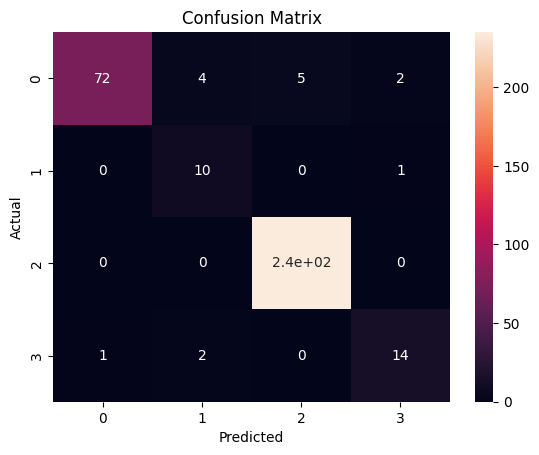

In [6]:
# Separate features and target variable


# Convert categorical variables into dummy/indicator variables

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels=["True Negative","False Negative","False Positive","True Positive"]
Categories=["Zero","One"]
ax=plt.subplot()
sns.heatmap(conf_matrix, ax=ax,annot=True,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()